_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-02 20:21:20--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.3’

misleading.py.3     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-02 20:21:20 (206 MB/s) - ‘misleading.py.3’ saved [1258/1258]



### Fix misleading plot #1

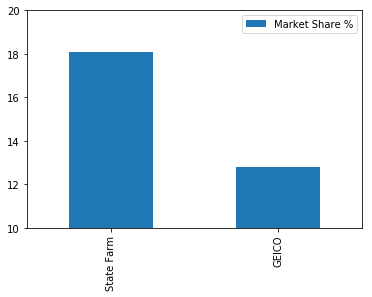

In [5]:
# The Y axis doesn't seem to be set at 0
misleading.plot1();

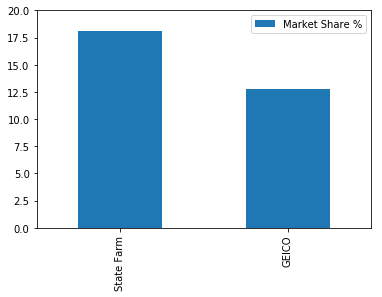

In [6]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})

insurance.plot.bar(ylim=(0, 20));
# Fixed it by changing the ylimit to 0 instead of 10

### Fix misleading plot #2

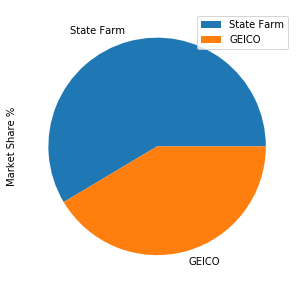

In [7]:
# It's a Pi Chart
# It does not represent the whole market.
# Only shows 2 companies instead of the rest of them. 
# Might be OK in a duopoly like: Pepsi vs Coke | Apple vs Android

misleading.plot2();


In [8]:
# Find what their market shares are and subtract from 100 to define Other
other = pd.DataFrame(
    index=['Other'], 
    data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


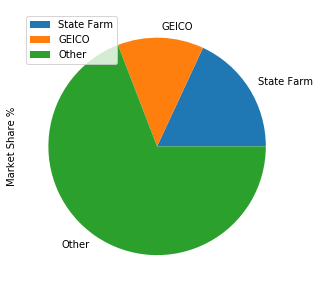

In [9]:
insurance.plot.pie('Market Share %', figsize=(5, 5));

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [11]:
# This one basically shows people live in california...
# weighing the population against the policy premiums
misleading.plot3()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [0]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df= pd.read_csv(url)

In [13]:
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [14]:
(df['State Farm policy premiums'] + df['BERKSHIRE HATHAWAY GRP'] == df['STATE TOTAL']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [15]:
df['State Farm market share %'] = df['State Farm policy premiums'] / df['STATE TOTAL']
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


In [16]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
variable = 'State Farm market share %'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm market share %',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATHA

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [18]:
df.shape

(44, 3)

### See the data

In [19]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [21]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [22]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [23]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [24]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [25]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

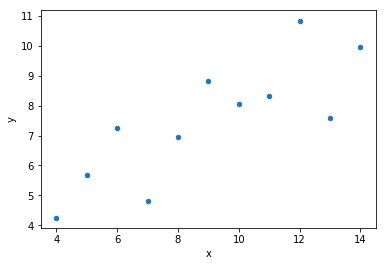

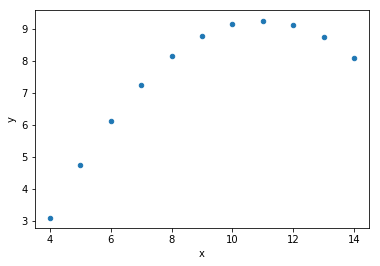

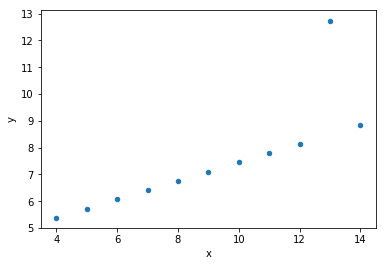

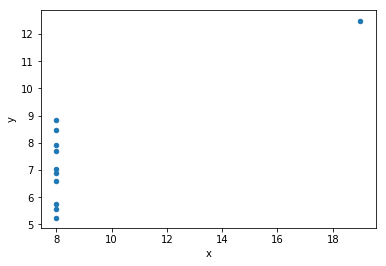

In [26]:
groups.plot('x', 'y', kind='scatter');
#groups.plot.scatter('x', 'y') Another way
# plot 1: Pretty good visualization with some error
# plot 2: perfect quadrilatic correlation
# plot 3: perfect but what happened
# plot 4: maybe it is categorical data, or the outlier is truly correct

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

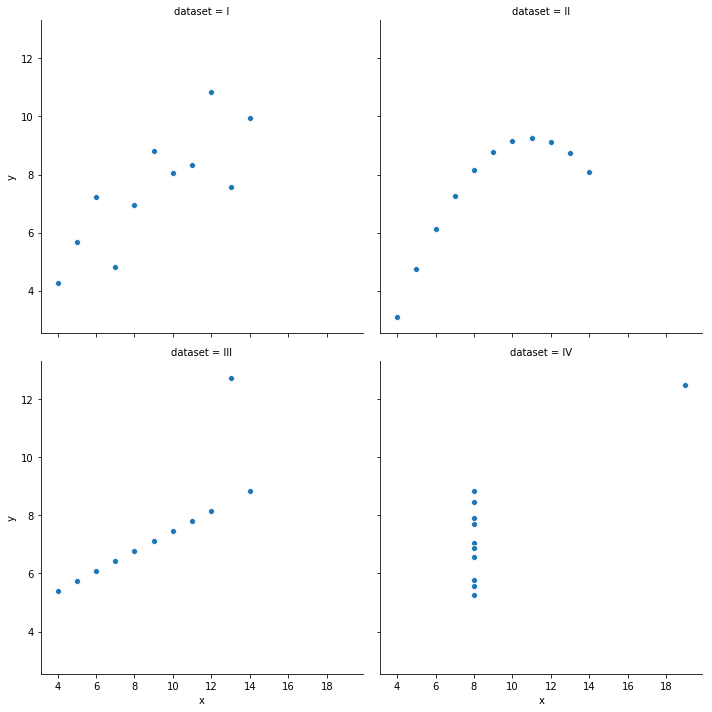

In [27]:
sns.relplot('x', 'y', col='dataset', data=df, col_wrap=2)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

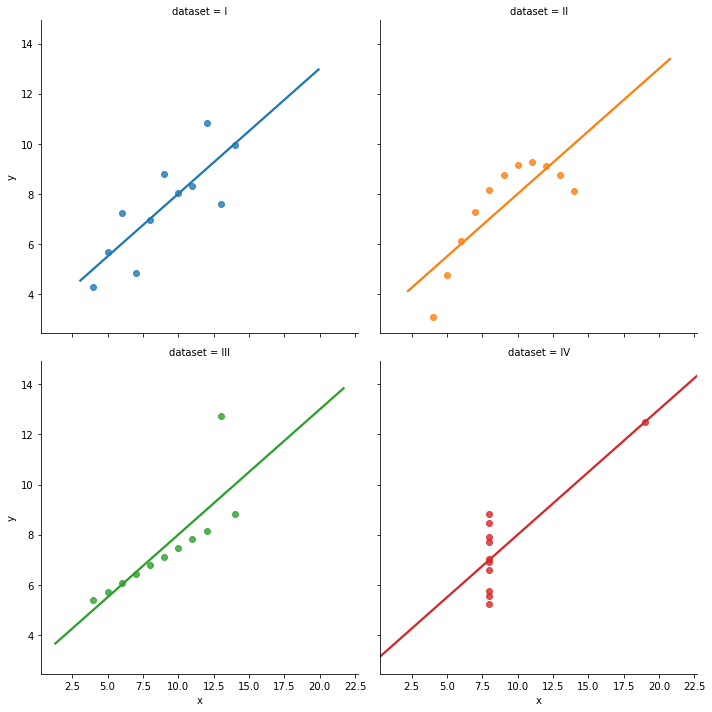

In [28]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', data=df, col_wrap=2, ci=None);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [30]:
tips.shape

(244, 7)

### See the first 5 rows

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
# You could encode day as well 
tips['smoker'] = tips['smoker'].replace({
    'No': 0,
    'Yes': 1
})

### Describe the data

In [33]:
tips.describe()

,total_bill,tip,smoker,size
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.381148,2.569672
std,8.902412,1.383638,0.486667,0.951100
min,3.070000,1.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,2.000000
50%,17.795000,2.900000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,3.000000
max,50.810000,10.000000,1.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

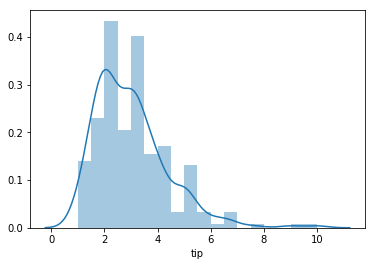

In [34]:
sns.distplot(tips.tip);

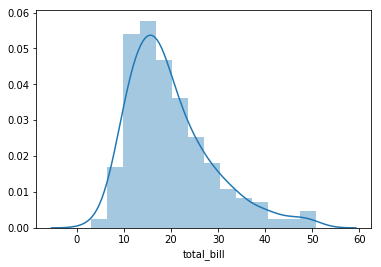

In [35]:
sns.distplot(tips.total_bill);

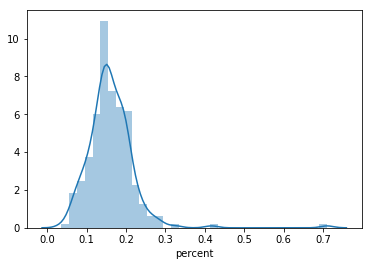

In [36]:
tips['percent'] = tips.tip / tips.total_bill
sns.distplot(tips.percent);

In [37]:
# Now we bin
# Add sort_index to see the groups in proper order
tips['percent'].value_counts(bins=20).sort_index()

(0.034, 0.0694]     6
(0.0694, 0.103]    25
(0.103, 0.137]     42
(0.137, 0.171]     78
(0.171, 0.204]     60
(0.204, 0.238]     20
(0.238, 0.272]      7
(0.272, 0.306]      3
(0.306, 0.339]      1
(0.339, 0.373]      0
(0.373, 0.407]      0
(0.407, 0.44]       1
(0.44, 0.474]       0
(0.474, 0.508]      0
(0.508, 0.542]      0
(0.542, 0.575]      0
(0.575, 0.609]      0
(0.609, 0.643]      0
(0.643, 0.677]      0
(0.677, 0.71]       1
Name: percent, dtype: int64

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

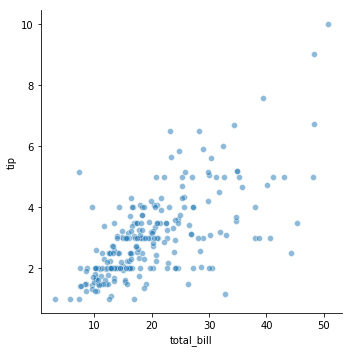

In [38]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5);

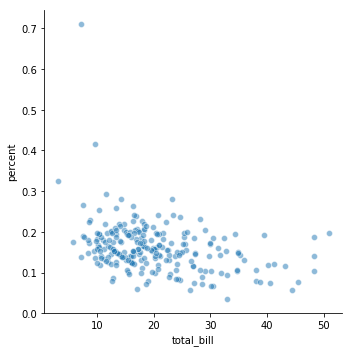

In [39]:
sns.relplot('total_bill', 'percent', data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [40]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

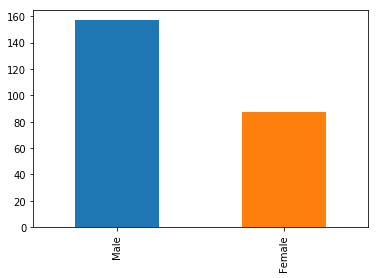

In [41]:
tips.sex.value_counts().plot.bar();

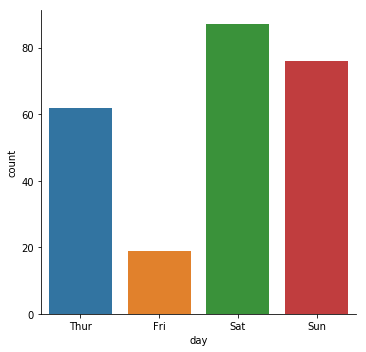

In [42]:
sns.catplot('day', data=tips, kind='count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

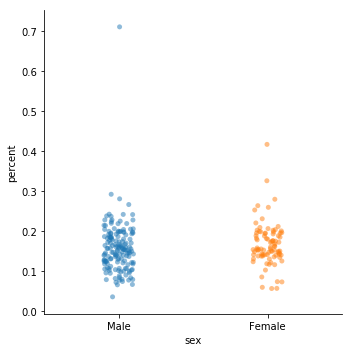

In [43]:
sns.catplot('sex', 'percent', data=tips, kind='strip', alpha=0.5);

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [45]:
flights.shape

(144, 3)

### See the first 5 rows

In [46]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [47]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

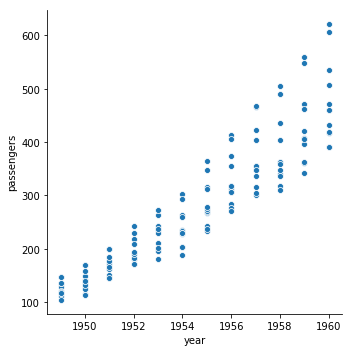

In [48]:
sns.relplot('year', 'passengers', data=flights);

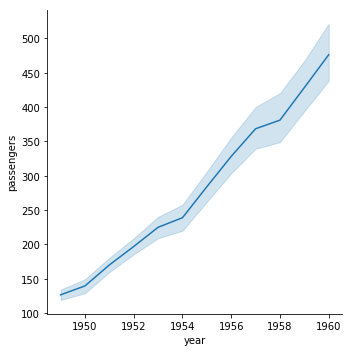

In [49]:
sns.relplot('year', 'passengers', data=flights, kind='line', ci=95);

### Plot month & passengers

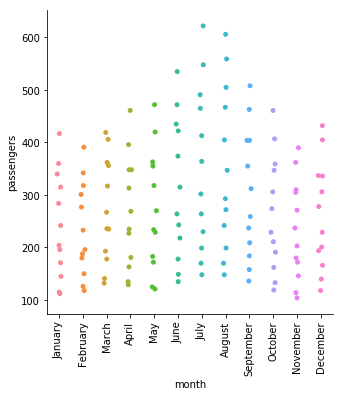

In [50]:
sns.catplot('month', 'passengers', data=flights);
plt.xticks(rotation=90);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [51]:
table = flights.pivot_table('passengers', 'month', 'year')

table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

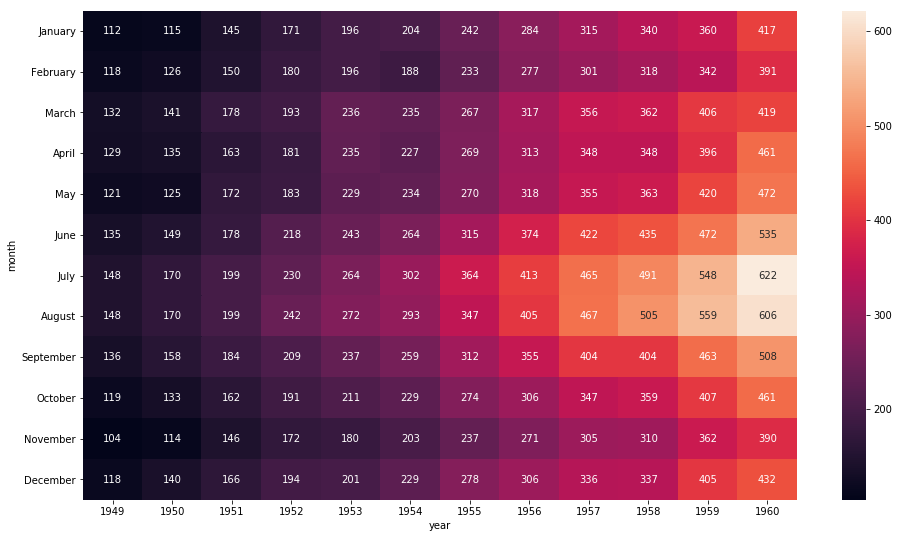

In [52]:
plt.figure(figsize=(16,9))
sns.heatmap(table, annot=True, fmt='d');

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

**During the lecture, I was following along above, I will however replicate some fun parts of the lesson**

In [53]:
# Checking out the size
tips.shape

(244, 8)

In [54]:
# Checking out the DS
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent
0,16.99,1.01,Female,0,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,0,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,0,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,0,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,0,Sun,Dinner,4,0.146808


In [55]:
# I was going to encode Day, but they are only open 4 days a week
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [0]:
# Encoding sex
# In the lesson we had encoded smoker

tips['sex'] = tips['sex'].replace({
    'Female': 1,
    'Male': 2
})

In [57]:
# Encoding worked
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent
0,16.99,1.01,1,0,Sun,Dinner,2,0.059447
1,10.34,1.66,2,0,Sun,Dinner,3,0.160542
2,21.01,3.50,2,0,Sun,Dinner,3,0.166587
3,23.68,3.31,2,0,Sun,Dinner,2,0.139780
4,24.59,3.61,1,0,Sun,Dinner,4,0.146808


**Below, we see that the average bill is 20 dollars, and the average tip is 3 dollars  **

In [58]:
tips.mean()

total_bill    19.785943
tip            2.998279
sex            1.643443
smoker         0.381148
size           2.569672
percent        0.160803
dtype: float64

In [59]:
# Standard Deviation
tips.std()

total_bill    8.902412
tip           1.383638
sex           0.479967
smoker        0.486667
size          0.951100
percent       0.061072
dtype: float64

In [60]:
# Correlation
tips.corr()

,total_bill,tip,sex,smoker,size,percent
total_bill,1.000000,0.675734,0.144877,0.085721,0.598315,-0.338624
tip,0.675734,1.000000,0.088862,0.005929,0.489299,0.342370
sex,0.144877,0.088862,1.000000,0.002816,0.086195,-0.069475
smoker,0.085721,0.005929,0.002816,1.000000,-0.133178,0.030820
size,0.598315,0.489299,0.086195,-0.133178,1.000000,-0.142860
percent,-0.338624,0.342370,-0.069475,0.030820,-0.142860,1.000000


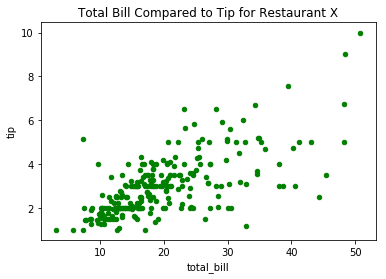

In [61]:
tips.plot('total_bill', 'tip', kind='scatter', 
          color='green', title=('Total Bill Compared to Tip for Restaurant X'));

From this chart I can make the following assumptions: 
*   The higher the bill, does not always mean the higher the tip
*    The average bill is about 20 dollars 
*   There are a few people who tipped higher 

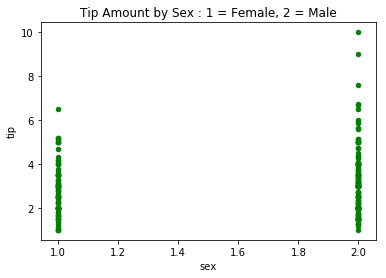

In [62]:
tips.plot('sex', 'tip', kind='scatter', 
          color='green', title=('Tip Amount by Sex : 1 = Female, 2 = Male'));

A previous example showed me that there are more men that frequent this restaurant than women. 
But also, based on this chart we can see that men who visit this restaurant tend to tip higher than women who visit. 

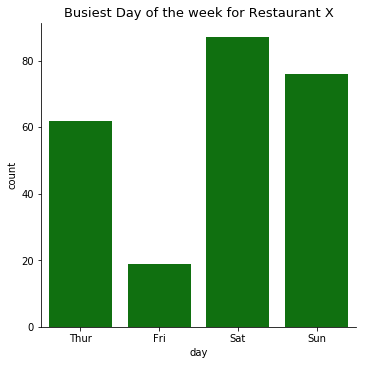

In [63]:
sns.catplot('day', data=tips, kind='count', color='green')
plt.title("Busiest Day of the week for Restaurant X", size=13);

We can see that Saturday is the busiest day of the week for this restaurant. 

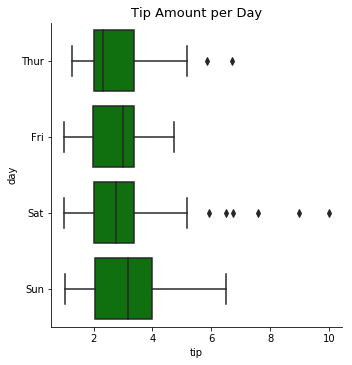

In [64]:
sns.catplot('tip', 'day', data=tips, kind='box', color='green')
plt.title('Tip Amount per Day', size=13);

Looking at what day of the week is the best for tips. 

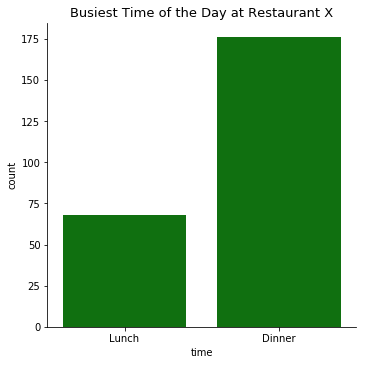

In [65]:
sns.catplot('time', data=tips, kind='count', color='green')
plt.title('Busiest Time of the Day at Restaurant X', size=13);

In [0]:
# Binning the bill totals, so it will be easier to work with 
tips['total_bill'] = tips['total_bill'].value_counts(bins=13).sort_index()

Looking at a Numeric Plot Below:

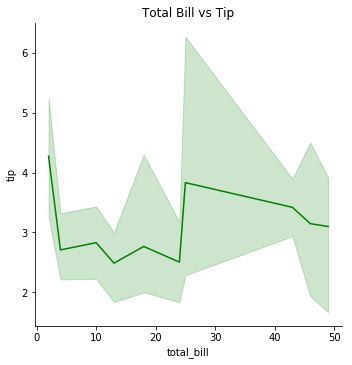

In [76]:
sns.relplot('total_bill', 'tip', data=tips, kind='line', ci=95, color='green')
plt.title('Total Bill vs Tip');

This plot does a good job showing what the total bill amount is in comparison to the tip received.

**Making some plots of my own with my DS**

In [0]:
import pandas as pd

In [0]:
df = ('https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv')

marvel = pd.read_csv(df)

In [79]:
marvel.shape

(16376, 13)

In [80]:
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [0]:
# dropping irrelevant columns
marvel = marvel.drop('urlslug', axis=1)

In [82]:
marvel.head()

,page_id,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [83]:
marvel.isnull().sum()

page_id                 0
name                    0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [0]:
# Dropping all NaN's, not optimal, but I would like a clean set
marvel = marvel.dropna()

In [0]:
# Found another irrelevant column
marvel.drop('GSM', axis=1)

**Are Most Characters Good or Evil?**

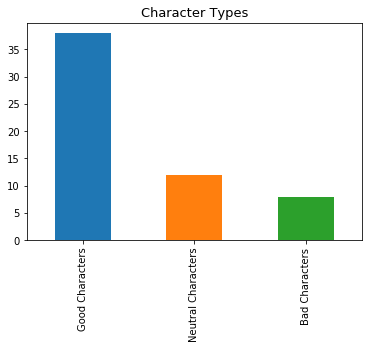

In [87]:
marvel['ALIGN'].value_counts().plot.bar()
plt.title('Character Types', size=13);

**Do the Characters keep their identities hidden or not?**

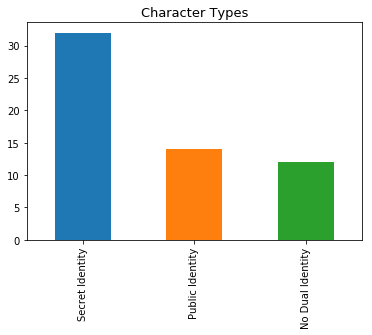

In [88]:
marvel['ID'].value_counts().plot.bar()
plt.title('Identity', size=13);

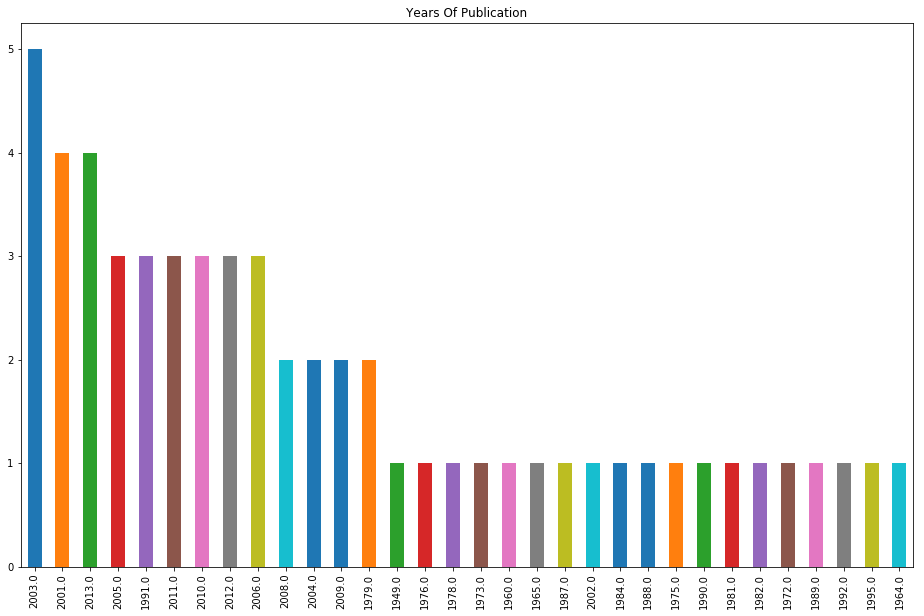

In [89]:
marvel['Year'].value_counts().plot.bar(figsize=(16,10))
plt.title('Years Of Publication');

**2003 was a big year for Marvel with more comics being published**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


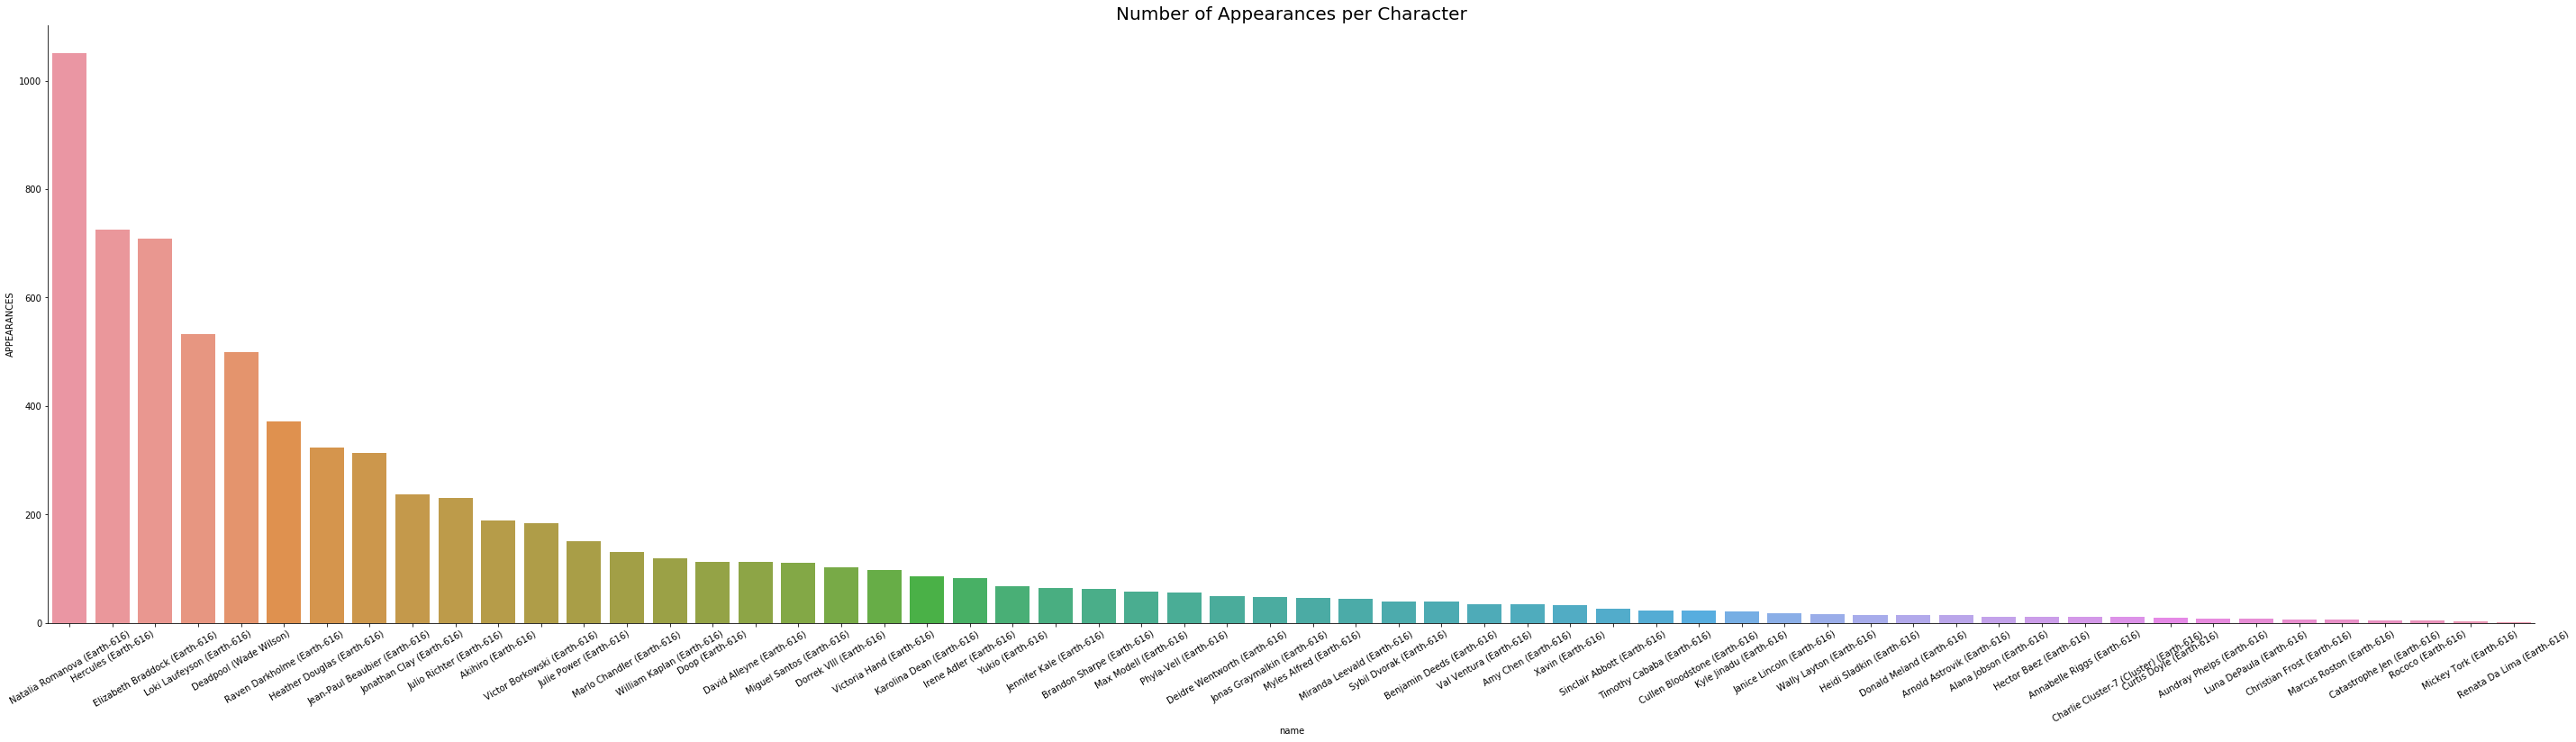

In [95]:
sns.catplot('name', 'APPEARANCES', data=marvel, kind='bar', height=10, aspect=4).set_xticklabels(rotation=30)
plt.title('Number of Appearances per Character', size=20);

**Based on my dataset, Natalia Romanova ( Black Widow ) has the most appearances**

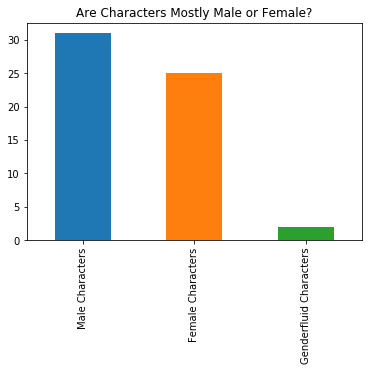

In [97]:
marvel.SEX.value_counts().plot.bar()
plt.title('Are Characters Mostly Male or Female?');